# Walk Score

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
city = 'San_Diego'

In [3]:
page = requests.get('https://www.walkscore.com/CA/'+city)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.table('tr')[1:]
alldat = []
for entry in table:
    split = entry.get_text().split()
    data = {
            'City': city.replace('_', ' '),
            'Neighborhood': ' '.join(split[1:-4]),
            'Walk': float(split[-4].replace('-','nan')),
            'Transit': float(split[-3].replace('-','nan')),
            'Bike': float(split[-2].replace('-','nan')),
            'Pop': int(split[-1].replace(',','')),
#             'logpop': np.log(int(split[-1].replace(',','')))
        }
    alldat.append(data)

In [4]:
ws = pd.DataFrame(alldat)

In [5]:
ws

,Bike,City,Neighborhood,Pop,Transit,Walk
0,65.0,San Diego,Core-Columbia,5338,81.0,98.0
1,82.0,San Diego,Horton Plaza,1474,81.0,97.0
2,66.0,San Diego,Little Italy,3169,77.0,97.0
3,77.0,San Diego,Gaslamp,976,80.0,97.0
4,74.0,San Diego,Harborview,525,75.0,97.0
5,54.0,San Diego,Cortez,3447,78.0,94.0
6,84.0,San Diego,Marina,5600,79.0,94.0
7,64.0,San Diego,East Village,10148,78.0,93.0
8,52.0,San Diego,Village,4491,33.0,88.0
9,59.0,San Diego,Sherman Heights,3340,68.0,87.0


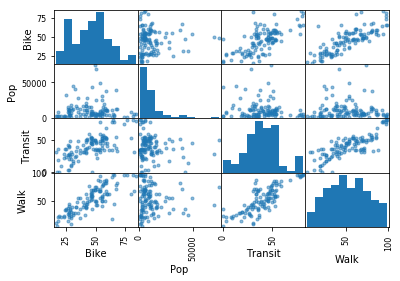

In [6]:
scatter = pd.scatter_matrix(ws)

In [6]:
import shapefile

In [7]:
# neighborhood shapefile data from Zillow:
# https://www.zillow.com/howto/api/neighborhood-boundaries.htm
ca_neighborhoods = shapefile.Reader("Data/CA Neighborhoods/ZillowNeighborhoods-CA.shp")
ca_neighborhood_metadata = ca_neighborhoods.shapeRecords()

In [8]:
sd_neighborhood_list = []
for i in range(len(ca_neighborhood_metadata)):
    if ca_neighborhood_metadata[i].record[2] == 'San Diego':
        sd_neighborhood_list.append(i)

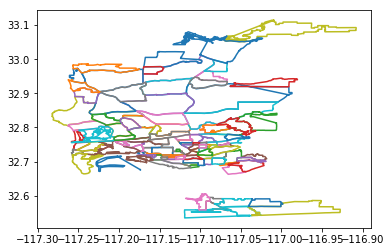

In [10]:
for i in sd_neighborhood_list:
    shape = ca_neighborhoods.shapes()[i]
    plt.plot(np.array(shape.points)[:,0], np.array(shape.points)[:,1])

# Census

In [9]:
import shapefile

In [10]:
#2015 census tracts
#https://www.census.gov/geo/maps-data/data/cbf/cbf_tracts.html
ca_tracts = shapefile.Reader("Data/CA Census Tracts/cb_2015_06_tract_500k.shp")

In [11]:
ca_tract_metadata = ca_tracts.shapeRecords()

In [12]:
sd_tract_list = []
for i in range(len(ca_tract_metadata)):
    if ca_tract_metadata[i].record[1] == '073':
        sd_tract_list.append(i)

In [13]:
len(sd_tract_list)

627

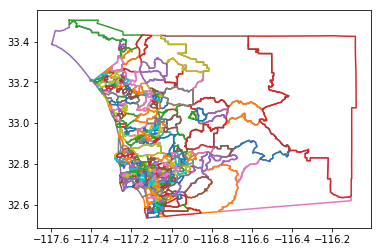

In [17]:
for i in sd_tract_list:
    shape = ca_tracts.shapes()[i]
    plt.plot(np.array(shape.points)[:,0], np.array(shape.points)[:,1])

# Matching tracts and neighborhoods

Example

In [14]:
import shapely
from shapely.geometry import Polygon

In [15]:
tract_shape = ca_tracts.shapes()[sd_tract_list[0]]
tract_poly = Polygon(tract_shape.points)

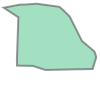

In [16]:
tract_poly

In [17]:
coverages = []
for i in sd_neighborhood_list:
    neighborhood_shape = ca_neighborhoods.shapes()[i]
    neighborhood_poly = Polygon(neighborhood_shape.points)
    
    area = tract_poly.area
    intersect_area = tract_poly.intersection(neighborhood_poly).area
    coverage = intersect_area/area
    coverages.append(coverage) 
    if coverage > .5:
        break
best_neighborhood = sd_neighborhood_list[np.argmax(coverages)]
best_coverage = np.max(coverages)

In [18]:
neighborhood_shape = ca_neighborhoods.shapes()[best_neighborhood]
neighborhood_poly = Polygon(neighborhood_shape.points)

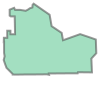

In [19]:
neighborhood_poly

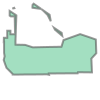

In [20]:
neighborhood_poly.difference(tract_poly)

In [21]:
best_coverage

0.96740606489498049

Populate full dictionary

In [26]:
tract_coverage = {i: {} for i in sd_tract_list}
counter = 0
for i in sd_tract_list:
    tract_shape = ca_tracts.shapes()[i]
    tract_poly = Polygon(tract_shape.points).buffer(0)
    
    for j in sd_neighborhood_list:
        neighborhood_shape = ca_neighborhoods.shapes()[j]
        neighborhood_poly = Polygon(neighborhood_shape.points).buffer(0)

        area = tract_poly.area
        intersect_area = tract_poly.intersection(neighborhood_poly).area
        coverage = 0 if area == 0 else intersect_area/area
        if coverage > 0:
            tract_coverage[i][j] = coverage
    counter += 1
    print("%s / %s" %(counter, len(sd_tract_list)))

1 / 627
2 / 627
3 / 627
4 / 627
5 / 627
6 / 627
7 / 627
8 / 627
9 / 627
10 / 627
11 / 627
12 / 627
13 / 627
14 / 627
15 / 627
16 / 627
17 / 627
18 / 627
19 / 627
20 / 627
21 / 627
22 / 627
23 / 627
24 / 627
25 / 627
26 / 627
27 / 627
28 / 627
29 / 627
30 / 627
31 / 627
32 / 627
33 / 627
34 / 627
35 / 627
36 / 627
37 / 627
38 / 627
39 / 627
40 / 627
41 / 627
42 / 627
43 / 627
44 / 627
45 / 627
46 / 627
47 / 627
48 / 627
49 / 627
50 / 627
51 / 627
52 / 627
53 / 627
54 / 627
55 / 627
56 / 627
57 / 627
58 / 627
59 / 627
60 / 627
61 / 627
62 / 627
63 / 627
64 / 627
65 / 627
66 / 627
67 / 627
68 / 627
69 / 627
70 / 627
71 / 627
72 / 627
73 / 627
74 / 627
75 / 627
76 / 627
77 / 627
78 / 627
79 / 627
80 / 627
81 / 627
82 / 627
83 / 627
84 / 627
85 / 627
86 / 627
87 / 627
88 / 627
89 / 627
90 / 627
91 / 627
92 / 627
93 / 627
94 / 627
95 / 627
96 / 627
97 / 627
98 / 627
99 / 627
100 / 627
101 / 627
102 / 627
103 / 627
104 / 627
105 / 627
106 / 627
107 / 627
108 / 627
109 / 627
110 / 627
111 / 62

In [28]:
import json
with open('Data/tract_coverage.json', 'w') as fp:
    json.dump(tract_coverage, fp)

In [22]:
import json
with open('Data/tract_coverage.json', 'r') as fp:
    tract_coverage = json.load(fp)
tract_coverage = dict([
    (int(k), dict([(int(k2),v2) for k2,v2 in v.items()])) 
    for k, v in tract_coverage.items()])

In [24]:
neighborhood_coverage = {i: {} for i in sd_neighborhood_list}
for i in sd_neighborhood_list:
    for j in sd_tract_list:
        if i in tract_coverage[j].keys():
            neighborhood_coverage[i][j] = tract_coverage[j][i]

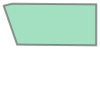

In [25]:
neighborhood_shape = ca_neighborhoods.shapes()[list(neighborhood_coverage.keys())[1]]
neighborhood_poly = Polygon(neighborhood_shape.points).buffer(0)
neighborhood_poly

In [98]:
tract_polygons = []
for key in neighborhood_coverage[list(neighborhood_coverage.keys())[1]]:
    tract_shape = ca_tracts.shapes()[key]
    tract_poly = Polygon(tract_shape.points).buffer(-0.00001)
    tract_polygons.append(tract_poly)

In [99]:
from shapely.geometry import MultiPolygon

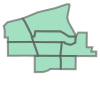

In [100]:
MultiPolygon(tract_polygons)

In [173]:
import json
with open('Data/neighborhood_coverage.json', 'w') as fp:
    json.dump(neighborhood_coverage, fp)

In [23]:
import json
with open('Data/neighborhood_coverage.json', 'r') as fp:
    neighborhood_coverage = json.load(fp)
neighborhood_coverage = dict([
    (int(k), dict([(int(k2),v2) for k2,v2 in v.items()])) 
    for k, v in neighborhood_coverage.items()])

# Tract populations

In [27]:
import pandas as pd

In [24]:
tract_pop = pd.read_csv('Data/Tract Populations/ACS_15_5YR_B01003_with_ann.csv',
                 skiprows = [0])
tract_pop = tract_pop[['Geography', 'Estimate; Total']]
tract_pop.columns = ['Tract', "Population"]

In [25]:
for i, row in tract_pop.iterrows():
    start = 13
    end = row.Tract.find(",")
    tract_pop.set_value(i,'Tract',row.Tract[start:end])

In [30]:
tract_pop

,Tract,Population
0,1,2716
1,2.01,2223
2,2.02,4683
3,3,4875
4,4,3606
5,5,2873
6,6,2904
7,7,4576
8,8,3927
9,9,5184


In [31]:
sd_tract_ids = {}
for i in sd_tract_list:
    tract_id = ca_tracts.shapeRecords()[i].record[2]
    start = str(int(tract_id[:-2]))
    end = tract_id[-2:]
    if end !='00':
        cleaned_id = '.'.join([start,end])
    else:
        cleaned_id = start
    sd_tract_ids[i] = cleaned_id

KeyboardInterrupt: 

In [29]:
sd_tract_ids

{387: '4',
 388: '21',
 389: '27.10',
 390: '31.05',
 391: '33.03',
 392: '39.01',
 393: '57',
 394: '63',
 395: '75.01',
 396: '83.13',
 397: '83.59',
 398: '86',
 399: '93.05',
 400: '98.04',
 401: '100.13',
 402: '101.11',
 403: '104.01',
 404: '108',
 405: '125.01',
 406: '129',
 407: '132.04',
 408: '134.01',
 409: '138.01',
 410: '139.09',
 411: '159.02',
 412: '170.31',
 413: '170.34',
 414: '170.52',
 415: '175.02',
 416: '179',
 417: '185.09',
 418: '189.04',
 419: '199.04',
 420: '200.28',
 421: '202.09',
 422: '205',
 423: '211',
 692: '193.02',
 693: '194.05',
 694: '198.04',
 695: '200.19',
 696: '201.05',
 697: '202.06',
 698: '203.08',
 699: '206.01',
 700: '209.03',
 701: '212.02',
 702: '214',
 703: '220',
 1143: '6',
 1183: '13',
 1184: '20.02',
 1185: '26.01',
 1186: '27.07',
 1187: '29.05',
 1188: '31.09',
 1189: '32.01',
 1190: '35.01',
 1191: '36.02',
 1192: '44',
 1193: '73.01',
 1194: '79.05',
 1237: '83.27',
 1238: '83.40',
 1239: '83.48',
 1240: '83.55',
 1241

In [30]:
import json
with open('Data/sd_tract_ids.json', 'w') as fp:
    json.dump(sd_tract_ids, fp)

In [26]:
import json
with open('Data/sd_tract_ids.json', 'r') as fp:
    sd_tract_ids = json.load(fp)
sd_tract_ids = dict([(int(k), v) for k, v in sd_tract_ids.items()])

# Neighborhood populations

In [27]:
neighborhood_names = [ca_neighborhood_metadata[i].record[3] for i in sd_neighborhood_list]
neighborhood_pop = []
for i in sd_neighborhood_list:
    tracts_in_neighborhood = neighborhood_coverage[i]
    partial_sum = 0
    for tract in tracts_in_neighborhood.keys():
        tract_id = sd_tract_ids[tract]
        contribution = tracts_in_neighborhood[tract]
        pop = tract_pop.loc[tract_pop['Tract'] == tract_id, 'Population'].values[0]
        partial_sum += pop*contribution
    neighborhood_pop.append(partial_sum)

In [28]:
neighborhood_pop_census = pd.DataFrame(
    {
        'Neighborhood': neighborhood_names,
        'Population': neighborhood_pop
    }
)

In [29]:
merged = neighborhood_pop_census.merge(ws, left_on='Neighborhood', right_on='Neighborhood')

# How close is our tract based estimate to WalkScore populations?

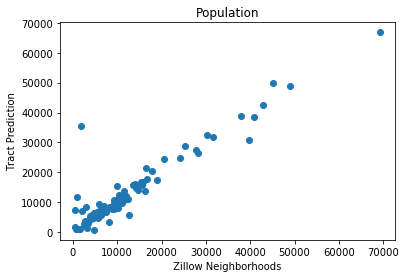

In [30]:
plt.scatter(merged['Pop'], merged["Population"])
plt.xlabel('Zillow Neighborhoods')
plt.ylabel('Tract Prediction')
plt.title('Population')

In [31]:
from scipy import stats
stats.pearsonr(merged['Pop'], merged["Population"])

(0.93905288380046459, 6.5534716159289652e-45)

# Commute times

In [32]:
tract_commutes = pd.read_csv('Data/Commute Time/ACS_15_5YR_B08303_with_ann.csv',
                             skiprows = [0])
time_cols = tract_commutes.columns[np.where(['Estimate' in col for col in tract_commutes.columns])]
selection = np.hstack(['Geography', time_cols])
tract_commutes = tract_commutes[selection]
tract_commutes.columns = [
   'Tract', 
   'Commuters',
   'Commute Time Less than 5 minutes',
   'Commute Time 5 to 9 minutes',
   'Commute Time 10 to 14 minutes',
   'Commute Time 15 to 19 minutes',
   'Commute Time 20 to 24 minutes',
   'Commute Time 25 to 29 minutes',
   'Commute Time 30 to 34 minutes',
   'Commute Time 35 to 39 minutes',
   'Commute Time 40 to 44 minutes',
   'Commute Time 45 to 59 minutes',
   'Commute Time 60 to 89 minutes',
   'Commute Time 90 or more minutes'
]
for i, row in tract_commutes.iterrows():
    start = 13
    end = row.Tract.find(",")
    tract_commutes.set_value(i,'Tract',row.Tract[start:end])

In [52]:
neighborhood_names = [ca_neighborhood_metadata[i].record[3] for i in sd_neighborhood_list]
commute_dict = {col: [] for col in tract_commutes.columns[1:]}

for i in sd_neighborhood_list:
    tracts_in_neighborhood = neighborhood_coverage[i]
    partial_sums = {key: 0 for key in commute_dict.keys()}
    for tract in tracts_in_neighborhood.keys():
        tract_id = sd_tract_ids[tract]
        contribution = tracts_in_neighborhood[tract]
        
        for key in commute_dict.keys():
            value = tract_commutes.loc[tract_commutes['Tract'] == tract_id, key].values[0]
            partial_sums[key] += value*contribution
    for key in commute_dict.keys():
        commute_dict[key].append(partial_sums[key])
commute_dict['Neighborhood'] = neighborhood_names

In [53]:
order = np.hstack([['Neighborhood'], tract_commutes.columns[1:]])

In [54]:
neighborhood_commute_counts = pd.DataFrame(commute_dict)[order]

In [55]:
neighborhood_commute_counts

,Neighborhood,Commuters,Commute Time Less than 5 minutes,Commute Time 5 to 9 minutes,Commute Time 10 to 14 minutes,Commute Time 15 to 19 minutes,Commute Time 20 to 24 minutes,Commute Time 25 to 29 minutes,Commute Time 30 to 34 minutes,Commute Time 35 to 39 minutes,Commute Time 40 to 44 minutes,Commute Time 45 to 59 minutes,Commute Time 60 to 89 minutes,Commute Time 90 or more minutes
0,Del Mar Heights,2719.605131,64.011597,247.585076,430.947902,516.680533,519.080101,269.855845,478.131318,11.998802,13.597703,65.296569,10.303229,92.116456
1,Normal Heights,5682.175181,33.769134,429.912902,929.262979,1454.599044,975.707458,400.207749,545.070297,118.834016,203.338165,256.900095,169.730194,164.843148
2,North Clairemont,6937.596258,60.539510,365.645357,1106.969240,1896.105815,1675.587502,592.664012,588.214654,121.267410,144.278528,211.865340,65.158315,109.300575
3,Ocean Beach,7328.230899,133.185931,503.107293,1266.549930,1493.524135,1636.634011,596.512149,828.809680,142.864348,219.735803,310.809727,97.691595,98.806297
4,Rancho Penasquitos,23377.482147,165.499720,1060.547041,2623.967533,3811.907351,5022.226680,2618.873033,4578.894625,592.338546,850.643201,1206.931657,443.655682,401.997079
5,South Park,2997.892487,6.128610,153.327694,591.221363,613.474673,671.347961,233.245739,335.063034,17.827361,113.282049,195.403221,58.357279,9.213502
6,Grantville,4492.149515,69.009945,365.557132,607.077188,1079.035548,1075.536509,256.778361,506.472929,78.641083,100.991415,109.452901,127.313749,116.282754
7,Hillcrest,9125.363860,174.013878,771.545577,1473.333719,2213.965350,1432.380857,636.052618,1044.428516,241.438420,218.592569,438.633905,306.869242,174.109208
8,La Playa,968.996063,18.302464,55.236805,127.020241,242.207759,154.616003,56.082673,157.186666,15.575589,48.083253,72.527288,7.676638,14.480687
9,Mira Mesa,34449.717595,405.060051,2448.159423,4831.814245,7412.335278,6878.247834,2858.278915,6078.339554,688.872869,939.320530,1163.285650,497.687027,248.316219


In [56]:
#Normalize rows
cols = neighborhood_commute_counts.columns
neighborhood_commute_percents = pd.concat(
    [
        neighborhood_commute_counts[cols[0]], 
        neighborhood_commute_counts[cols[2:]].div(neighborhood_commute_counts['Commuters'], axis = 0),
    ],
    axis = 1
)

In [81]:
#Get average commute times
times = [(0+4)/2, (5+9)/2, (10+14)/2, (15+19)/2, (20+24)/2, (25+29)/2, (30+34)/2,
(35+39)/2, (40+44)/2, (45+59)/2, (60+89)/2, 90]

av = []
for i in range(len(neighborhood_commute_percents)):
    av.append(np.dot(neighborhood_commute_percents.ix[i][1:], times))

In [83]:
neighborhood_commute_percents["Average"] = av

In [84]:
merged = neighborhood_commute_percents.merge(ws, on='Neighborhood').merge(neighborhood_pop_census, on='Neighborhood')

In [85]:
merged = merged.dropna()

Does walk score predict short commute times?

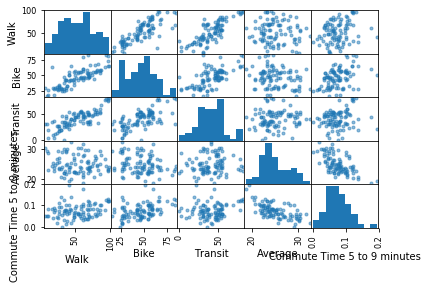

In [93]:
scatter = pd.scatter_matrix(merged[['Walk','Bike','Transit','Average',
                          'Commute Time 5 to 9 minutes']])

In [94]:
stats.pearsonr(merged['Transit'], merged['Average'])

(0.066247575753220891, 0.52582132014408833)

In [95]:
stats.pearsonr(merged['Transit'], merged['Commute Time 5 to 9 minutes'])

(0.17253174456929629, 0.096338275178600843)

In [96]:
stats.pearsonr(merged['Walk'], merged['Commute Time 5 to 9 minutes'])

(0.25798036198209495, 0.012059627125456333)

# Income and housing prices